# Density-based spatial clustering of applications with noise (DBSCAN)

In [78]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PCA.pca import calculate_principal_components, project_onto_components
import warnings

warnings.filterwarnings("ignore")
INF = sys.maxsize

In [79]:
# Loading our dataset using pandas
df = pd.read_csv("../data/iris.csv")

# Splitting data
outcomes = np.array(df["species"].map({species: i for i, species in enumerate(df["species"].unique())}))
data = np.array(df.drop(["species"], axis=1).values)

# Normilizing data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print(f"Mean of each column: {np.mean(data, axis=0)}\n")
print(f"Standard deviation of each column: {np.std(data, axis=0)}")

Mean of each column: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]

Standard deviation of each column: [1. 1. 1. 1.]


In [80]:
def get_neighbours(data, index, min_distance):
    neighbours = []
    p = data[index]

    for i, q in enumerate(data):
        if p is not q:
            if np.linalg.norm(p - q) < min_distance:
                neighbours.append(i)

    return neighbours

In [81]:
def dbscan(data, min_number_of_neighbours, min_distance):
    number_of_classes = 1
    
    classification = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        if classification[i] != 0:
            continue

        n = get_neighbours(data, i, min_distance)
        if len (n) < min_number_of_neighbours: 
            continue

        # Find and classify the points in the cluster
        s = [*n]
        while s != []:

            # Ignore the point if it has already been classified
            if classification[s[0]] != 0:
                s.pop(0)
                continue

            # Get the neighbours and set the class of the point to the current class
            n = get_neighbours(data, s[0], min_distance)
            classification[s[0]] = number_of_classes
            s.pop(0)

            # Do not search neighbours if point has less neighbours than required amount of neighbours
            if len(n) < min_number_of_neighbours:
                continue

            # If it has the required amount of neighbours add the neighbours to the list of point to be searched
            s.extend(n)

        number_of_classes += 1

    return classification

In [82]:
classifications = dbscan(data, 5, 1)

In [83]:
components, _ = calculate_principal_components(data, components=2)
projected_data = project_onto_components(data, components)

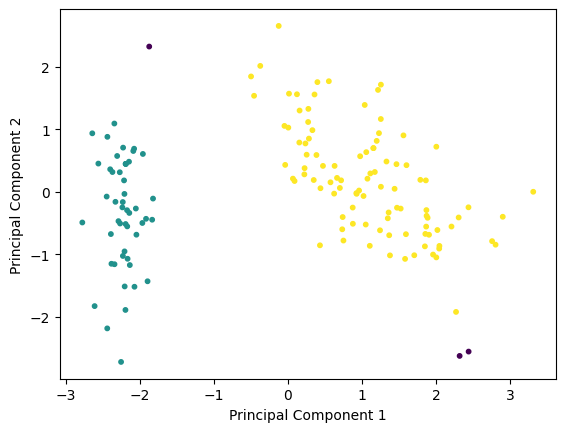

In [84]:
plt.xlabel(f"Principal Component 1")
plt.ylabel(f"Principal Component 2")
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=classifications, s=10)

plt.show()